In [40]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neural_network import MLPClassifier

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN, Flatten
from keras import optimizers

import os

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")

## Questão 02

### item A)

In [2]:
# Carregamento do csv
df = pd.read_csv('/home/viviane/Documentos/datasets/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv',index_col='Unnamed: 0',usecols=['Unnamed: 0','Review Text','Rating'])

In [3]:
# Uma amostra dos dados
df.head(5)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [4]:
# Dimensões do dataset
df.shape

(23486, 2)

In [5]:
# Quantidade de textos
df['Review Text'].shape

(23486,)

In [6]:
# Quantidade de classes existentes no problema
df['Rating'].unique().shape

(5,)

In [7]:
# Classes existentes no problema
df['Rating'].unique()

array([4, 5, 3, 2, 1])

In [8]:
df.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [9]:
df = df.dropna(how='any',axis=0)

In [10]:
df.isnull().sum()

Review Text    0
Rating         0
dtype: int64

In [11]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
y = le.fit_transform(y)

In [14]:
X.shape

(22641,)

In [15]:
y.shape

(22641,)

In [16]:
X[100]

"The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40."

In [17]:
y[100]

1

In [18]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [19]:
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [20]:
stop = stopwords.words('english')

In [21]:
def preprocessing(texto):
    texto = preprocessor(texto)
    aux = [w for w in tokenizer_porter(texto) if w not in stop]
    output = ''
    output = output + aux[0]
    for i in aux[1:]:
        output = output + ' ' + i
    return output

In [22]:
for i in range(0,len(X)):
    X[i] = preprocessing(X[i])

In [23]:
X[100]

'fabric felt cheap find flatter top refer wear medium photo measur 38 30 40'

In [24]:
count = CountVectorizer()

In [25]:
bag = count.fit_transform(X)

In [26]:
tfidf = TfidfTransformer()

In [27]:
tf_v = tfidf.fit_transform(bag)

In [28]:
res_a = []
for i in range(0,5):
    print('Texto: ', X[i])
    print('TF-IDF: ', tf_v[i].data)
    print('\n----------------------------------\n')

Texto:  absolut wonder silki sexi comfort
TF-IDF:  [0.44227076 0.56172223 0.51263852 0.2696221  0.39162531]

----------------------------------

Texto:  love thi dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit 5 8 love length hit littl knee would definit true midi someon truli petit
TF-IDF:  [0.19517107 0.21749268 0.13332796 0.04852079 0.12785379 0.26711943
 0.18618393 0.12560115 0.38241549 0.09883138 0.13742185 0.18454059
 0.25216678 0.14006787 0.10802322 0.11935315 0.16758936 0.15723491
 0.22068163 0.17058347 0.15112677 0.08122661 0.14110878 0.11565722
 0.49490515]

----------------------------------

Texto:  high hope thi dress realli want work initi order petit small usual size found thi outrag small small fact could zip reorder petit medium wa ok overal top half wa comfort fit nice bottom half veri tight layer sever somewhat cheap net layer imo major design flaw wa net layer sewn directli zipper c
TF-IDF:  [0.12971741 0.14028826 0.07913223

### item B)

In [29]:
X_data = tf_v.toarray()

In [30]:
len(X_data)

22641

In [31]:
X_matrix, X_test, y_matrix, y_test = model_selection.train_test_split(X_data,y,test_size=0.1,random_state=42,stratify=y)

In [32]:
# dados para dividir em treino e validação
X_matrix.shape, y_matrix.shape

((20376, 9781), (20376,))

In [33]:
# dados de teste
X_test.shape, y_test.shape

((2265, 9781), (2265,))

In [34]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_matrix,y_matrix,test_size=0.11115,random_state=42,stratify=y_matrix)

In [35]:
# dados de treino
X_train.shape, y_train.shape

((18111, 9781), (18111,))

In [36]:
# dados de validação
X_val.shape, y_val.shape

((2265, 9781), (2265,))

In [48]:
acc = []
loss = []

In [49]:
model = MLPClassifier(learning_rate_init=0.001,warm_start=True,max_iter=1)

In [50]:
for i in range(40):
    acc_ = model.fit(X_train,y_train).score(X_val,y_val)
    acc.append(acc_)
    loss.append(model.loss_)
    print('acc: {} | loss: {}'.format(acc_,model.loss_))

acc: 0.5549668874172186 | loss: 1.2784637672628774
acc: 0.6260485651214128 | loss: 0.9684379339005992
acc: 0.6304635761589404 | loss: 0.8196405667194989
acc: 0.6428256070640177 | loss: 0.7246191595589349
acc: 0.6339955849889625 | loss: 0.6551494415679486
acc: 0.6304635761589404 | loss: 0.59812254619439
acc: 0.6251655629139072 | loss: 0.5483466909199258
acc: 0.6278145695364239 | loss: 0.5044436499447732
acc: 0.6136865342163356 | loss: 0.46648882365255095
acc: 0.6189845474613687 | loss: 0.4313091623268022
acc: 0.6158940397350994 | loss: 0.4002558822243566
acc: 0.6141280353200883 | loss: 0.37146884339987907
acc: 0.6088300220750552 | loss: 0.3455448874341565
acc: 0.6123620309050772 | loss: 0.3221951377232702
acc: 0.6026490066225165 | loss: 0.30110464553229177
acc: 0.601766004415011 | loss: 0.28005698090929515
acc: 0.6022075055187638 | loss: 0.26230010374445795
acc: 0.6030905077262693 | loss: 0.2441954396368733
acc: 0.6035320088300221 | loss: 0.22804038124458534
acc: 0.6004415011037527 | lo

In [51]:
acc_teste = model.score(X_test,y_test)

In [52]:
print('Acc test: ', acc_teste)

Acc test:  0.5713024282560707


In [53]:
def plotar(v_acc,v_loss,epo):
    acc = v_acc
    loss = v_loss
    epochs = range(1, epo + 1)

    plt.plot(epochs, acc, 'bo', label='Validation acc')
    plt.plot(epochs, loss, 'r', label='Validation loss')
    plt.title('validation acc and loss')
    plt.legend()
    plt.show()

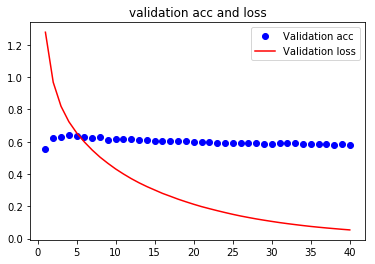

In [54]:
plotar(acc,loss,40)

### item C)